#Mini Project: Using the Mental Health dataset and what you have learn this week, answer the following questions :

## What is the distribution of mental health conditions among different age groups in the tech industry?


## How does the frequency of mental health issues vary by gender?

## Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.


In [ ]:
### Setup - Mental Health Dataset
## Using the dataset: survey.csv learn all about it
import pandas as pd
import seaborn as sns
import numpy as np ##all the important modules

from google.colab import files #ensure Colab can access this file
uploaded = files.upload()

df = pd.read_csv("survey.csv") #learn everything about this file!
print(df.shape)
print(df.dtypes)
print(df.head(90))
print(df.info())

Saving survey.csv to survey.csv
(1259, 27)
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments             

### SUMMARY OF DATASET:

There are 1259 rows with 27 columns. Of the 27 columns, only age is classified as an integer. The others are text, and will need to be re-classfied as 'datetime' (date) or category (all others).

For our purposes, we will need the following columns: age, treatment (if they have an issue or not), tech_company, gender, country. We should keep state and timestamp as well, just in case.


In [ ]:
###Data Quality - Check for missing values, then see what types of results we're working with for the columsn we care about
print(df.isnull().sum().sort_values(ascending=False))

print(df['treatment'].unique())
print(df['Gender'].unique())
print(df['Country'].unique())
print(df['state'].unique())
print(df['tech_company'].unique())


comments                     1095
state                         515
work_interfere                264
self_employed                  18
Gender                          0
Timestamp                       0
Age                             0
family_history                  0
treatment                       0
no_employees                    0
Country                         0
remote_work                     0
tech_company                    0
care_options                    0
benefits                        0
seek_help                       0
anonymity                       0
leave                           0
wellness_program                0
mental_health_consequence       0
phys_health_consequence         0
supervisor                      0
coworkers                       0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
dtype: int64
['Yes' 'No']
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'mai

In [ ]:
#Check the age
print(df['Age'].describe())
print("Min:", df['Age'].min(), "Max:", df['Age'].max())
print(df['Age'].unique())

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64
Min: -1726 Max: 99999999999
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [ ]:
duplicate_mask = df.duplicated()
print(df[duplicate_mask]) # no duplicates

Empty DataFrame
Columns: [Timestamp, Age, Gender, Country, state, self_employed, family_history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence, comments]
Index: []

[0 rows x 27 columns]


### DATA QUALITY:
There are some significant data quality issues for the following:

- Age: Data includes negative and unrealistic ages (beyond 100). These are likely outliers. As the queries focus on the role of mental health for employees, we will eliminate ages younger than 15 and over 75.

- Gender: There are typos and lack of standardized responses. So that we can derive meaningful results, we will bucket these into 'male' 'female' and 'other'.

- State: There are 515 missing values likely due applications outside of U.S.

- tech_company, treatment, and country should be changed to category.

- timestamp: change to datetime.

In [ ]:
#Data Cleaning:

#gender

df['Gender'] = df['Gender'].str.strip().str.lower() #avoid space issues

male_terms = ['m', 'male', 'msle', 'man', 'cis male', 'cis man', 'maile', 'mal', 'male (cis)', 'make', 'mail', 'malr', 'cis man', 'ostensibly male, unsure what that really means']
female_terms = ['female', 'f', 'woman', 'cis female', 'female (cis)', 'cis woman', 'femail', 'femake', 'cis-female/femme']

df['Gender'] = df['Gender'].replace(male_terms, 'Male')
df['Gender'] = df['Gender'].replace(female_terms, 'Female')

df['Gender'] = df['Gender'].where(df['Gender'].isin(['Male', 'Female']), 'Other') #move everything else to other cateogry

df['Gender'] = df['Gender'].astype('category') #change to category now
print(df['Gender'].value_counts())

#state

df['state'] = df['state'].str.strip() #avoid space issues
df['state'] = np.where(
    (df['Country'] == 'United States') & (df['state'].isna()), 'Unknown',   # US but missing so we fill in as "Unknown"
    np.where(df['Country'] != 'United States', 'Not in the U.S.', df['state']))      # Non-US

df['state'] = df['state'].astype('category') #change to category now

#country
df['Country'] = df['Country'].str.strip() #avoid space issues

#convert remaining data types - timestamp, treatment, and tech_company

df['Timestamp'] = pd.to_datetime(df['Timestamp']) #change to datetime

df['treatment'] = df['treatment'].astype('category')
df['tech_company'] = df['tech_company'].astype('category')

df = df[(df['Age'] >= 15) & (df['Age'] <= 75)] #filter to realistic age

Gender
Male      986
Female    247
Other      18
Name: count, dtype: int64


In [ ]:
#keep only relevant columns

filter_df = ['Age', 'Gender', 'Country','state', 'treatment','tech_company']

df = df[filter_df]

print(df.head())


   Age  Gender         Country            state treatment tech_company
0   37  Female   United States               IL       Yes          Yes
1   44    Male   United States               IN        No           No
2   32    Male          Canada  Not in the U.S.        No          Yes
3   31    Male  United Kingdom  Not in the U.S.       Yes          Yes
4   31    Male   United States               TX        No          Yes


In [ ]:
#Question 1: What is the distribution of mental health conditions among different age groups in the tech industry?
#Answer: Almost 60% of all respondents reporting a mental health condition in the tech industry were between thes ages
#of 25 and 34, with another 25% in the next bracket (35-44). We can assume that the reason only 11% were under 24 is that most people only begin working after teh age of 22.

15–24    11.4
25–34    57.1
35–44    24.9
45–54     4.7
55–64     2.0
65+       0.0
#filter by "Yes" tech_company and "Yes" treatment.

conditions = df[(df['treatment'] == 'Yes') & (df['tech_company'] == 'Yes')] #OR is | and #AND is&

print(conditions) #510 people meet this criteria


      Age  Gender         Country            state treatment tech_company
0      37  Female   United States               IL       Yes          Yes
3      31    Male  United Kingdom  Not in the U.S.       Yes          Yes
6      35  Female   United States               MI       Yes          Yes
8      42  Female   United States               IL       Yes          Yes
10     31    Male   United States               OH       Yes          Yes
...   ...     ...             ...              ...       ...          ...
1250   30    Male   United States               CA       Yes          Yes
1252   29    Male   United States               NC       Yes          Yes
1254   26    Male  United Kingdom  Not in the U.S.       Yes          Yes
1255   32    Male   United States               IL       Yes          Yes
1256   34    Male   United States               CA       Yes          Yes

[510 rows x 6 columns]


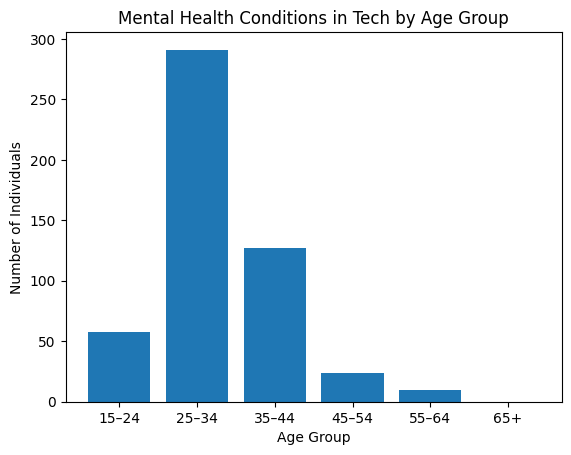

AgeGroup
15–24    11.4
25–34    57.1
35–44    24.9
45–54     4.7
55–64     2.0
65+       0.0
Name: count, dtype: float64


In [52]:
#let's make sure age groups are relatively even and not skewed further

bins   = [15, 24, 34, 44, 54, 64, 75]
labels = ['15–24','25–34','35–44','45–54','55–64','65+']
conditions.loc[:, 'AgeGroup'] = pd.cut(conditions['Age'], bins=bins, labels=labels, right=True).astype('category')

# Count per age group
age_counts = conditions['AgeGroup'].value_counts().sort_index()

# Bar chart
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.title('Mental Health Conditions in Tech by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.show()


age_pct = (age_counts / age_counts.sum()) * 100
print(age_pct.round(1))

treatment   No  Yes
Gender             
Female      77  170
Male       538  448
Other        4   14
Gender
Female    68.8
Male      45.4
Other     77.8
dtype: float64


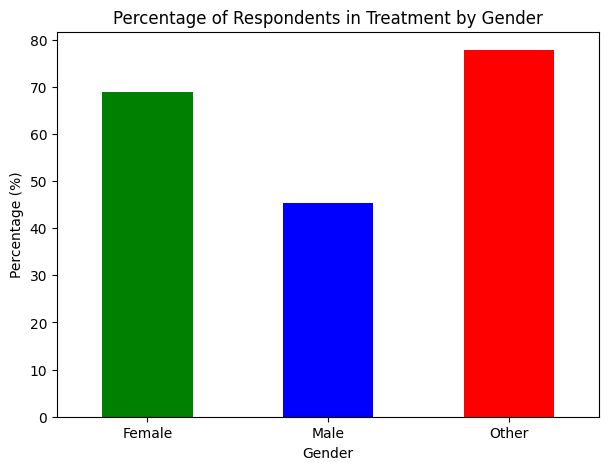

In [62]:
#Question 2: How does the frequency of mental health issues vary by gender?
#80% of those who identify as 'other' and '70% of those who identify as female have sought mental health treatment.
gender_dist = pd.crosstab(df['Gender'], df['treatment'])
print(gender_dist)
gender_pct_yes = (gender_dist['Yes'] / gender_dist.sum(axis=1)) * 100
print(gender_pct_yes.round(1))

gender_pct_yes.plot(kind='bar', figsize=(7,5), color=['green','blue','red'])
plt.title("Percentage of Respondents in Treatment by Gender")
plt.ylabel("Percentage (%)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()



In [67]:
#Countries with the highest and lowest reported rates of mental health issues in the tech industry.
#Highest: Croatia, Moldova, Japan, Denmark, Slovenia (because fewer submissions)
#Lowest: Philippines, Nigeria, Spain, Thailand, Uruguay. Similar situation


tech = df[df['tech_company'] == 'Yes']

# Counts per country
country_count = pd.crosstab(tech['Country'], tech['treatment'])

# Calculate totals and Yes %
country_count['total'] = country_count['Yes'] + country_count['No']
country_count['yes_rate'] = (country_count['Yes'] / country_count['total']) * 100

sorted_countries = country_count.sort_values(by='yes_rate', ascending=False)

print(sorted_countries.head(5)[['Yes','No','total','yes_rate']].round(1))

print(sorted_countries.tail(5)[['Yes','No','total','yes_rate']].round(1))


treatment  Yes  No  total  yes_rate
Country                            
Croatia      2   0      2     100.0
Moldova      1   0      1     100.0
Japan        1   0      1     100.0
Denmark      2   0      2     100.0
Slovenia     1   0      1     100.0
treatment    Yes  No  total  yes_rate
Country                              
Philippines    0   1      1       0.0
Nigeria        0   1      1       0.0
Spain          0   1      1       0.0
Thailand       0   1      1       0.0
Uruguay        0   1      1       0.0
